In [1]:
!pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 1.1 MB/s eta 0:00:00


In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
# Setting the default figure size for Matplotlib plots to be 5 inches by 5 inches.
matplotlib.rcParams['figure.figsize']=(5,5)

## Documentation
1) Finding missing values in the dataset
2) Some values of diameter were missing so removed those rows from dataset
3) Some of the parameters were missing most of the values(more than 90%) so removing those parameters as they will not be providing sufficient information about the diameter.
4) Changing the datatype of diameter from Object to Float.
5) Plotting graphs to understant the distribution of data points.

In [3]:
asteroid=pd.read_csv("Asteroid2.csv",engine='python')

In [4]:
asteroid.shape

(839714, 31)

In [5]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [6]:
asteroid['class'].value_counts()

MBA    747420
OMB     24715
IMB     17552
MCA     17354
APO     11759
AMO      8020
TJN      7385
TNO      3310
ATE      1601
CEN       488
AST        84
IEO        20
HYA         4
PAA         2
Name: class, dtype: int64

In [7]:
print("columns in asteroid",list(asteroid.columns))

columns in asteroid ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


## Info regarding columns

1) name =Name of asteroid
2) a = semi major axis
3) e = eccentricity
4) i = inclination with respect to x-y elliptical plane
5) om = longitude of the ascending node
6) w = argument of perihelion
7) q = perihelion distance
8) ad = aphelion distance
9) per_y = orbital period
10) data_Arc = data arc span(d)
11) condition_Code = orbit condition code
12) n_obs_used = number of observation used
13) H = absolute magnitude parameter
14) neo = Near earth object
15) pha = Physically hazardous object
16) diameter = diameter of asteroids
17) extent = Object bi/tri axial ellipsoid dimensions(Km)
18) albedo = geometric albedo
19) rot_per = rotation period

In [8]:
#finding missing values in dataset
asteroid.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [9]:
#looking at missing values of diameter
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [10]:
#removing those columns which have missing values of diameter
asteroid=asteroid.dropna(subset=['diameter'])

In [11]:
asteroid.shape

(137636, 31)

In [12]:
asteroid.isnull().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [13]:
#removing those variable which have a lot of missing values
asteroid=asteroid.drop('name',axis=1)
asteroid=asteroid.drop('extent',axis=1)
asteroid=asteroid.drop('GM',axis=1)
asteroid=asteroid.drop('BV',axis=1)
asteroid=asteroid.drop('UB',axis=1)
asteroid=asteroid.drop('IR',axis=1)
asteroid=asteroid.drop('spec_B',axis=1)
asteroid=asteroid.drop('spec_T',axis=1)
asteroid=asteroid.drop('G',axis=1)
asteroid=asteroid.drop('rot_per',axis=1)

In [14]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [15]:
asteroid.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [16]:
asteroid['diameter']=asteroid['diameter'].astype(float)
asteroid['a']=asteroid['a'].astype(float)

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'e'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'om'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'q'}>,
        <Axes: title={'center': 'ad'}>,
        <Axes: title={'center': 'per_y'}>],
       [<Axes: title={'center': 'data_arc'}>,
        <Axes: title={'center': 'n_obs_used'}>,
        <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'diameter'}>],
       [<Axes: title={'center': 'albedo'}>,
        <Axes: title={'center': 'moid'}>, <Axes: title={'center': 'n'}>,
        <Axes: title={'center': 'per'}>],
       [<Axes: title={'center': 'ma'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

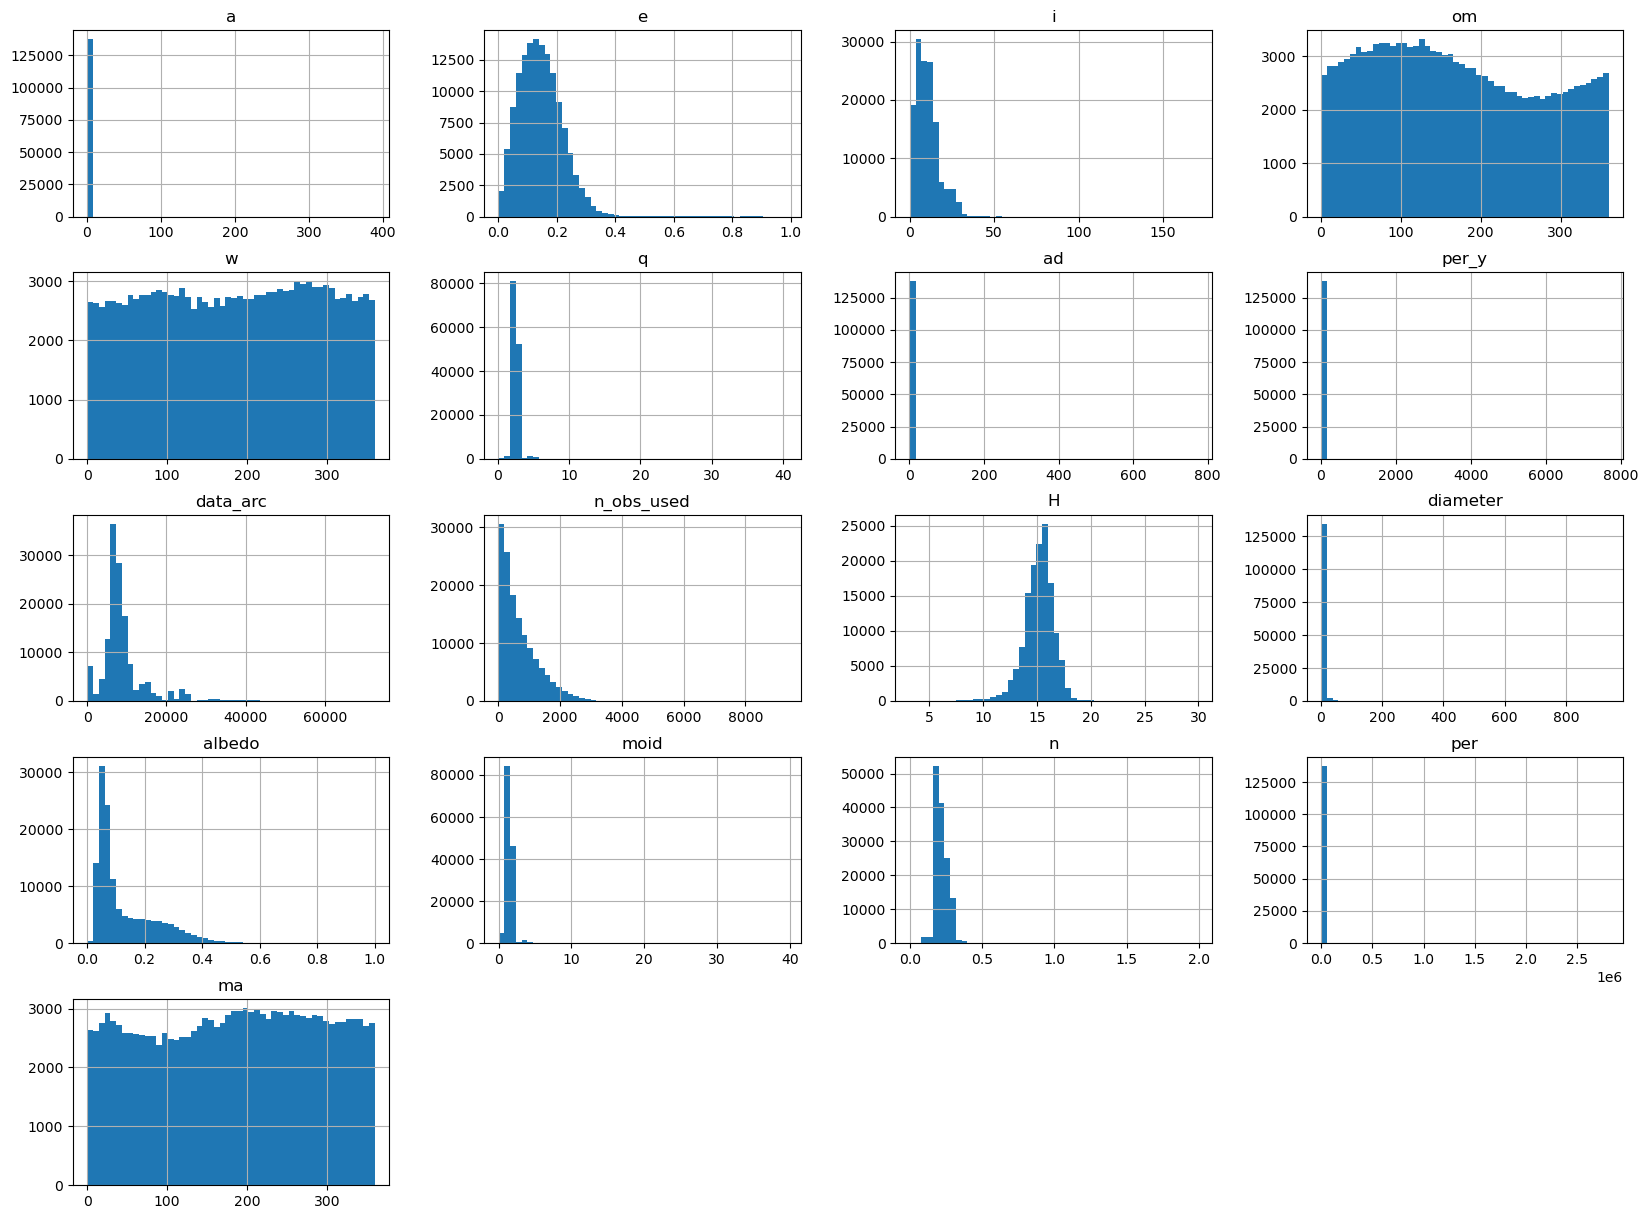

In [17]:
asteroid.hist(bins=50, figsize=(20 ,15))

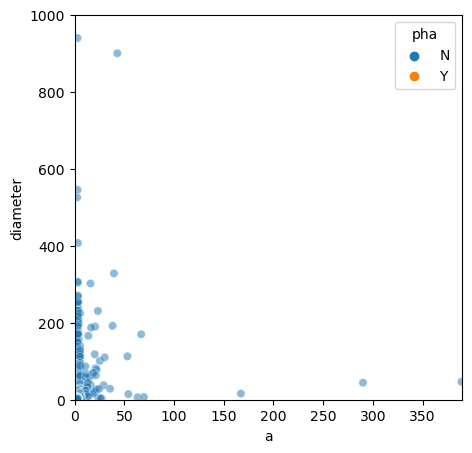

In [19]:
sns.scatterplot(data=asteroid,x='a',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,390])
plt.ylim([0,1000])
plt.show()

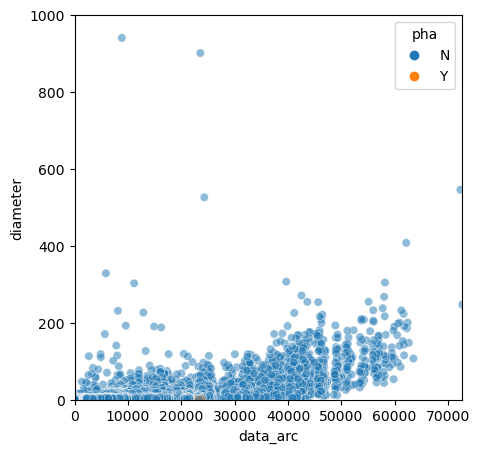

In [20]:
sns.scatterplot(data=asteroid,x='data_arc',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,72684])
plt.ylim([0,1000])
plt.show()

In [21]:
max(asteroid['albedo'])

1.0

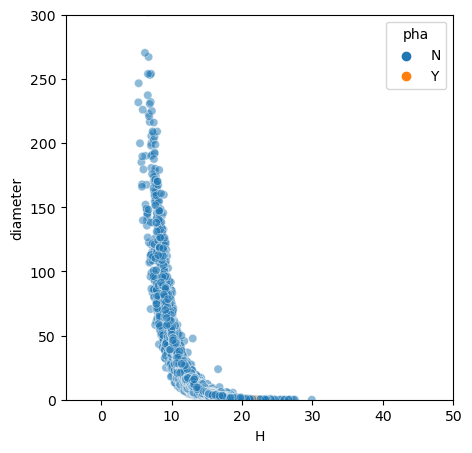

In [22]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show()

In [23]:
asteroid['H'] = -1*np.log(asteroid['H'])
asteroid['H'].max()

-1.1631508098056809

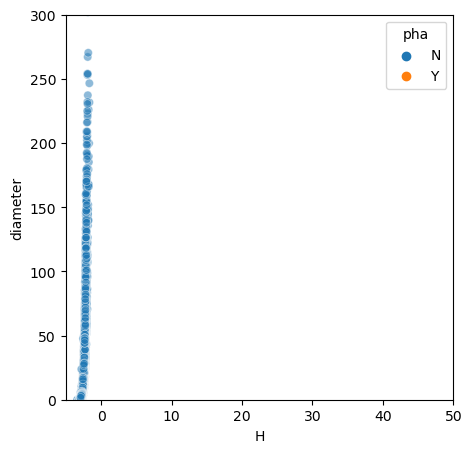

In [24]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([-5,50])
plt.ylim([0,300])
plt.show()

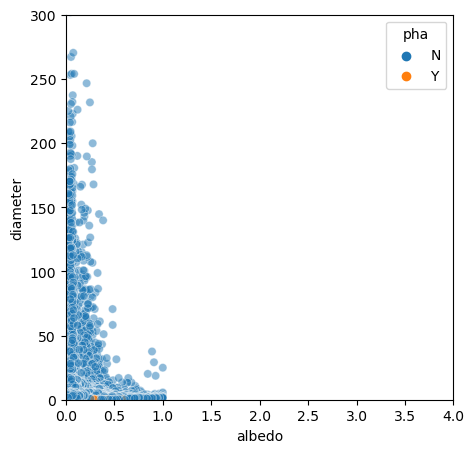

In [25]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,4])
plt.ylim([0,300])
plt.show()

In [26]:
asteroid['albedo'] = -1*np.log(asteroid['albedo'])
asteroid['albedo'].max()

6.907755278982137

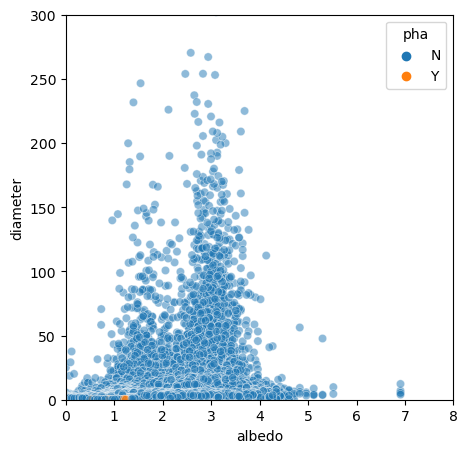

In [27]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,8])
plt.ylim([0,300])
plt.show()

In [28]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [29]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [30]:
asteroid.shape

(137636, 21)

data_arc=i,n_obs_used,H,diameter,albedo,data_arc (6)

H=e,q,data_arc,n_obs_used,diameter,albedo,moid,n (8)

albedo=a,q,data_arc,n_obs_used,H,diameter,moid,n (8)

## EDA

In [31]:
cols=['data_arc','H','albedo']

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
asteroid[cols] = impute_knn.fit_transform(asteroid[cols])

In [33]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

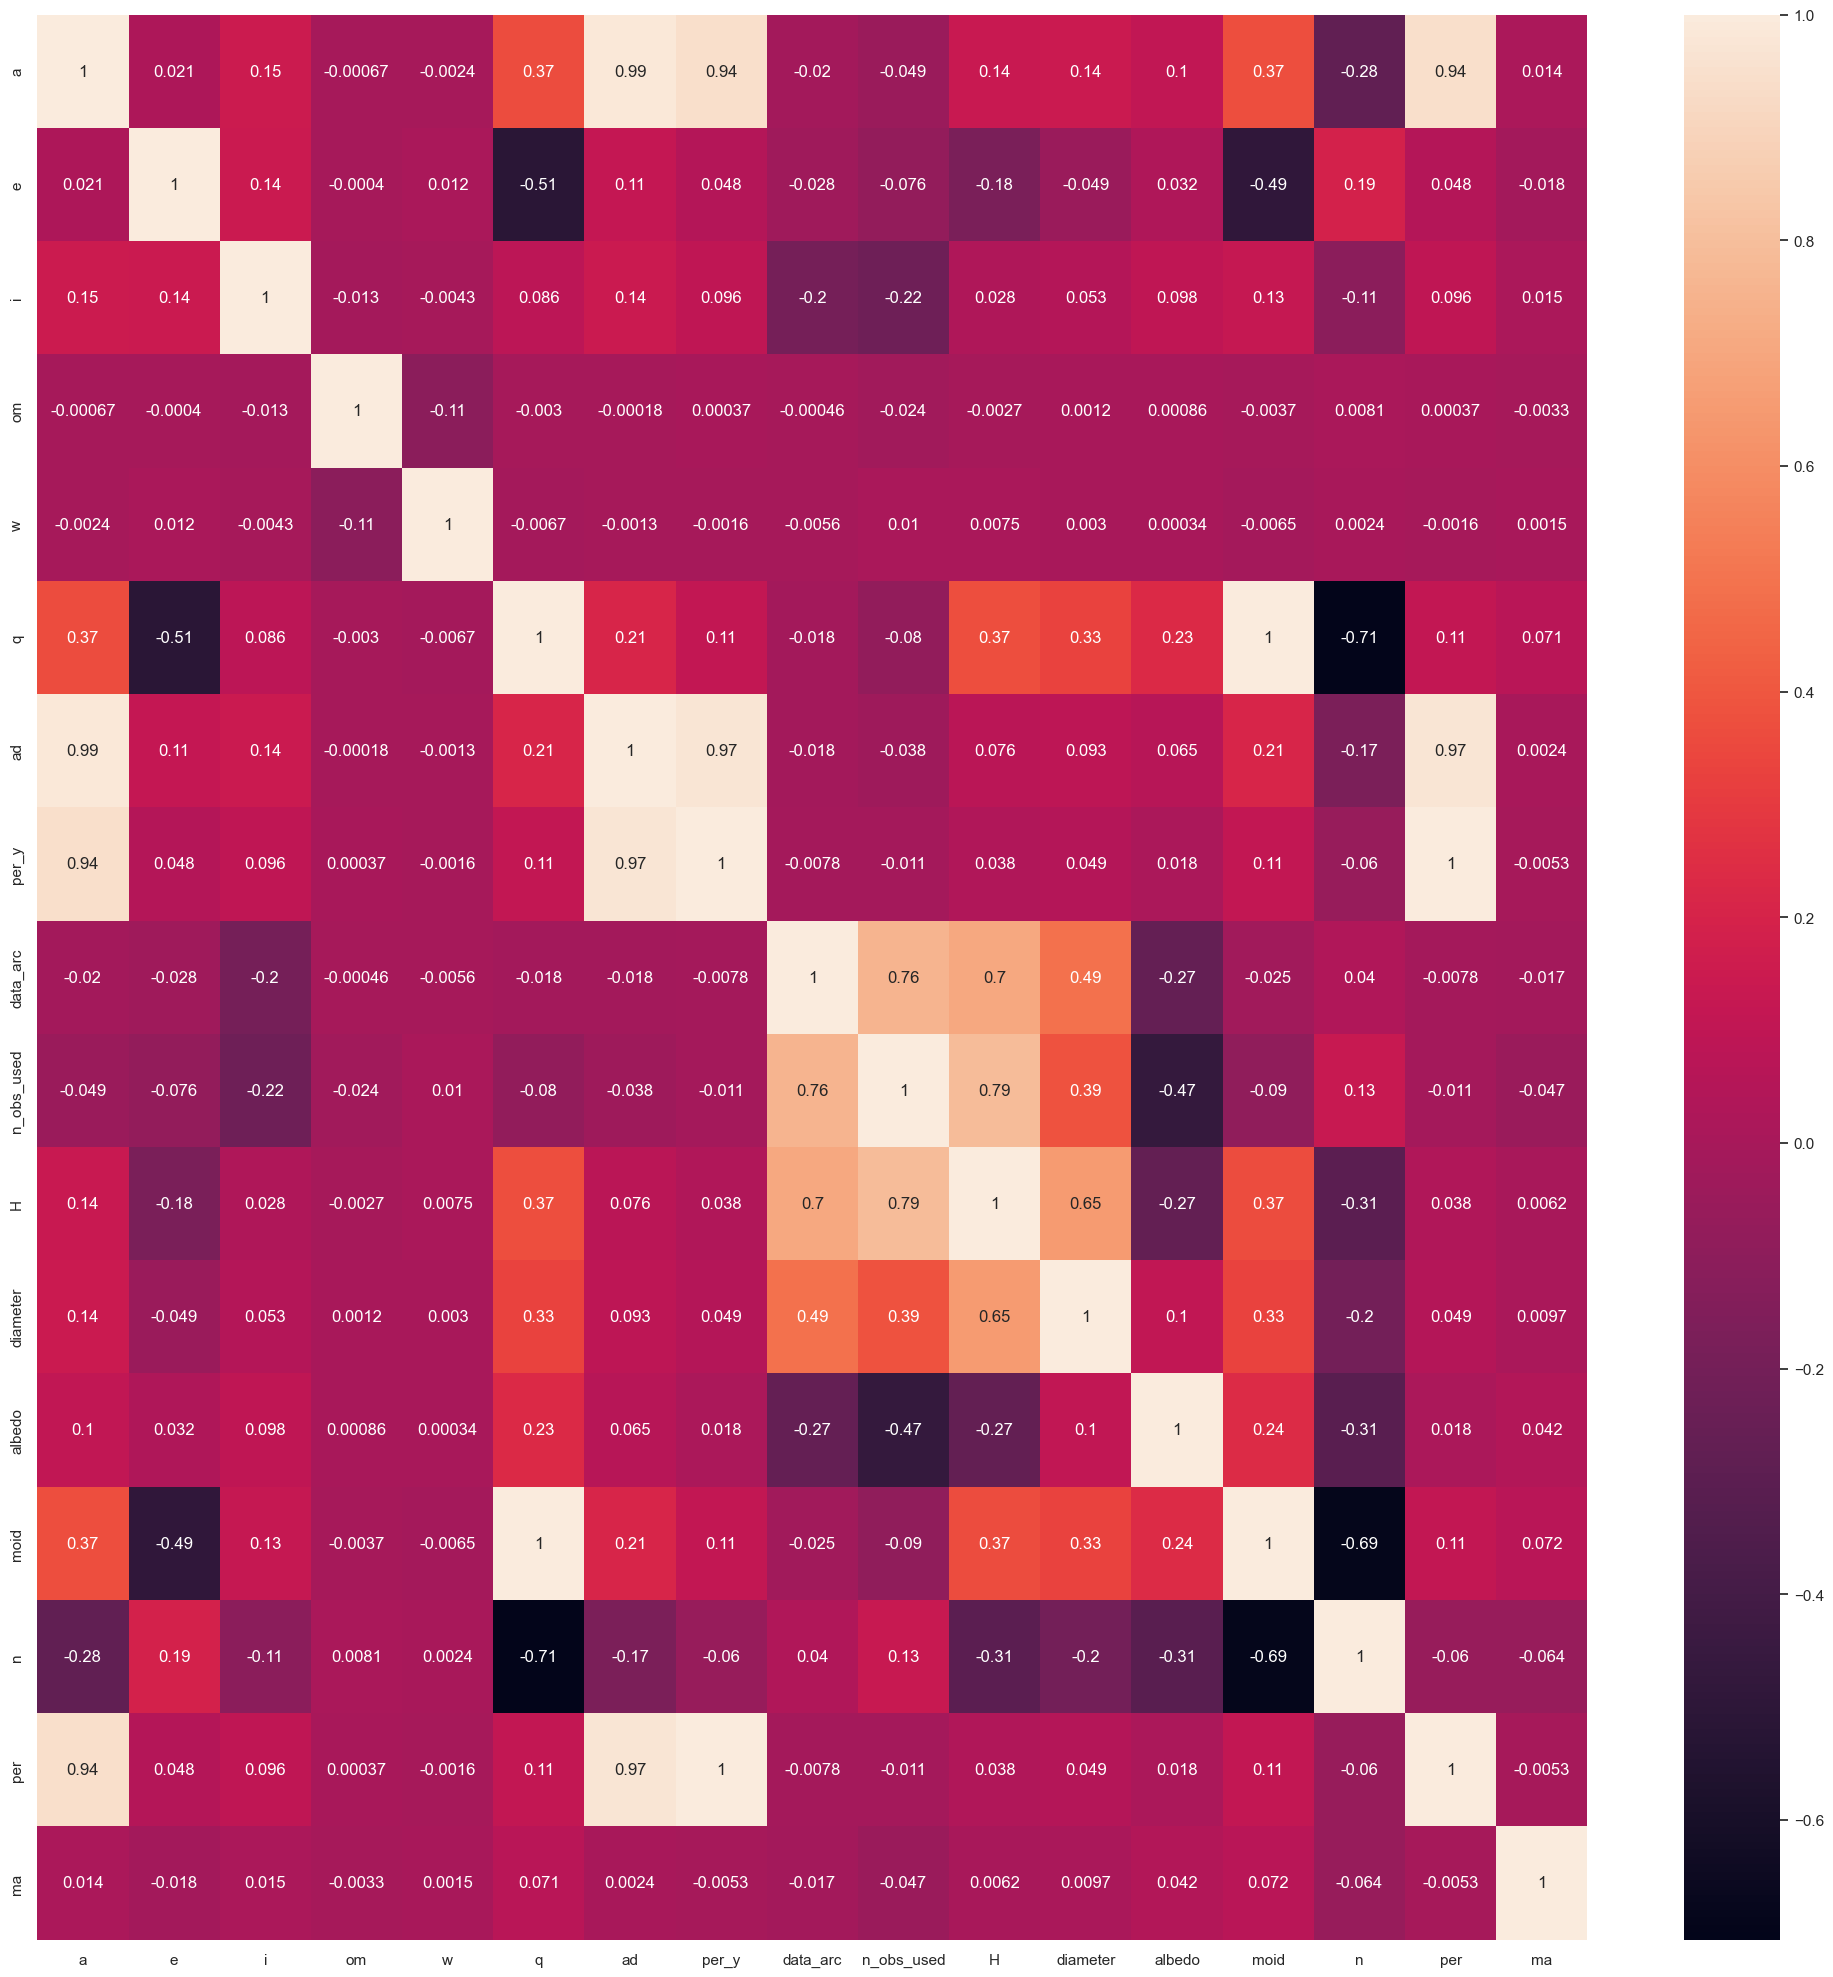

In [34]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(asteroid.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

<Axes: >

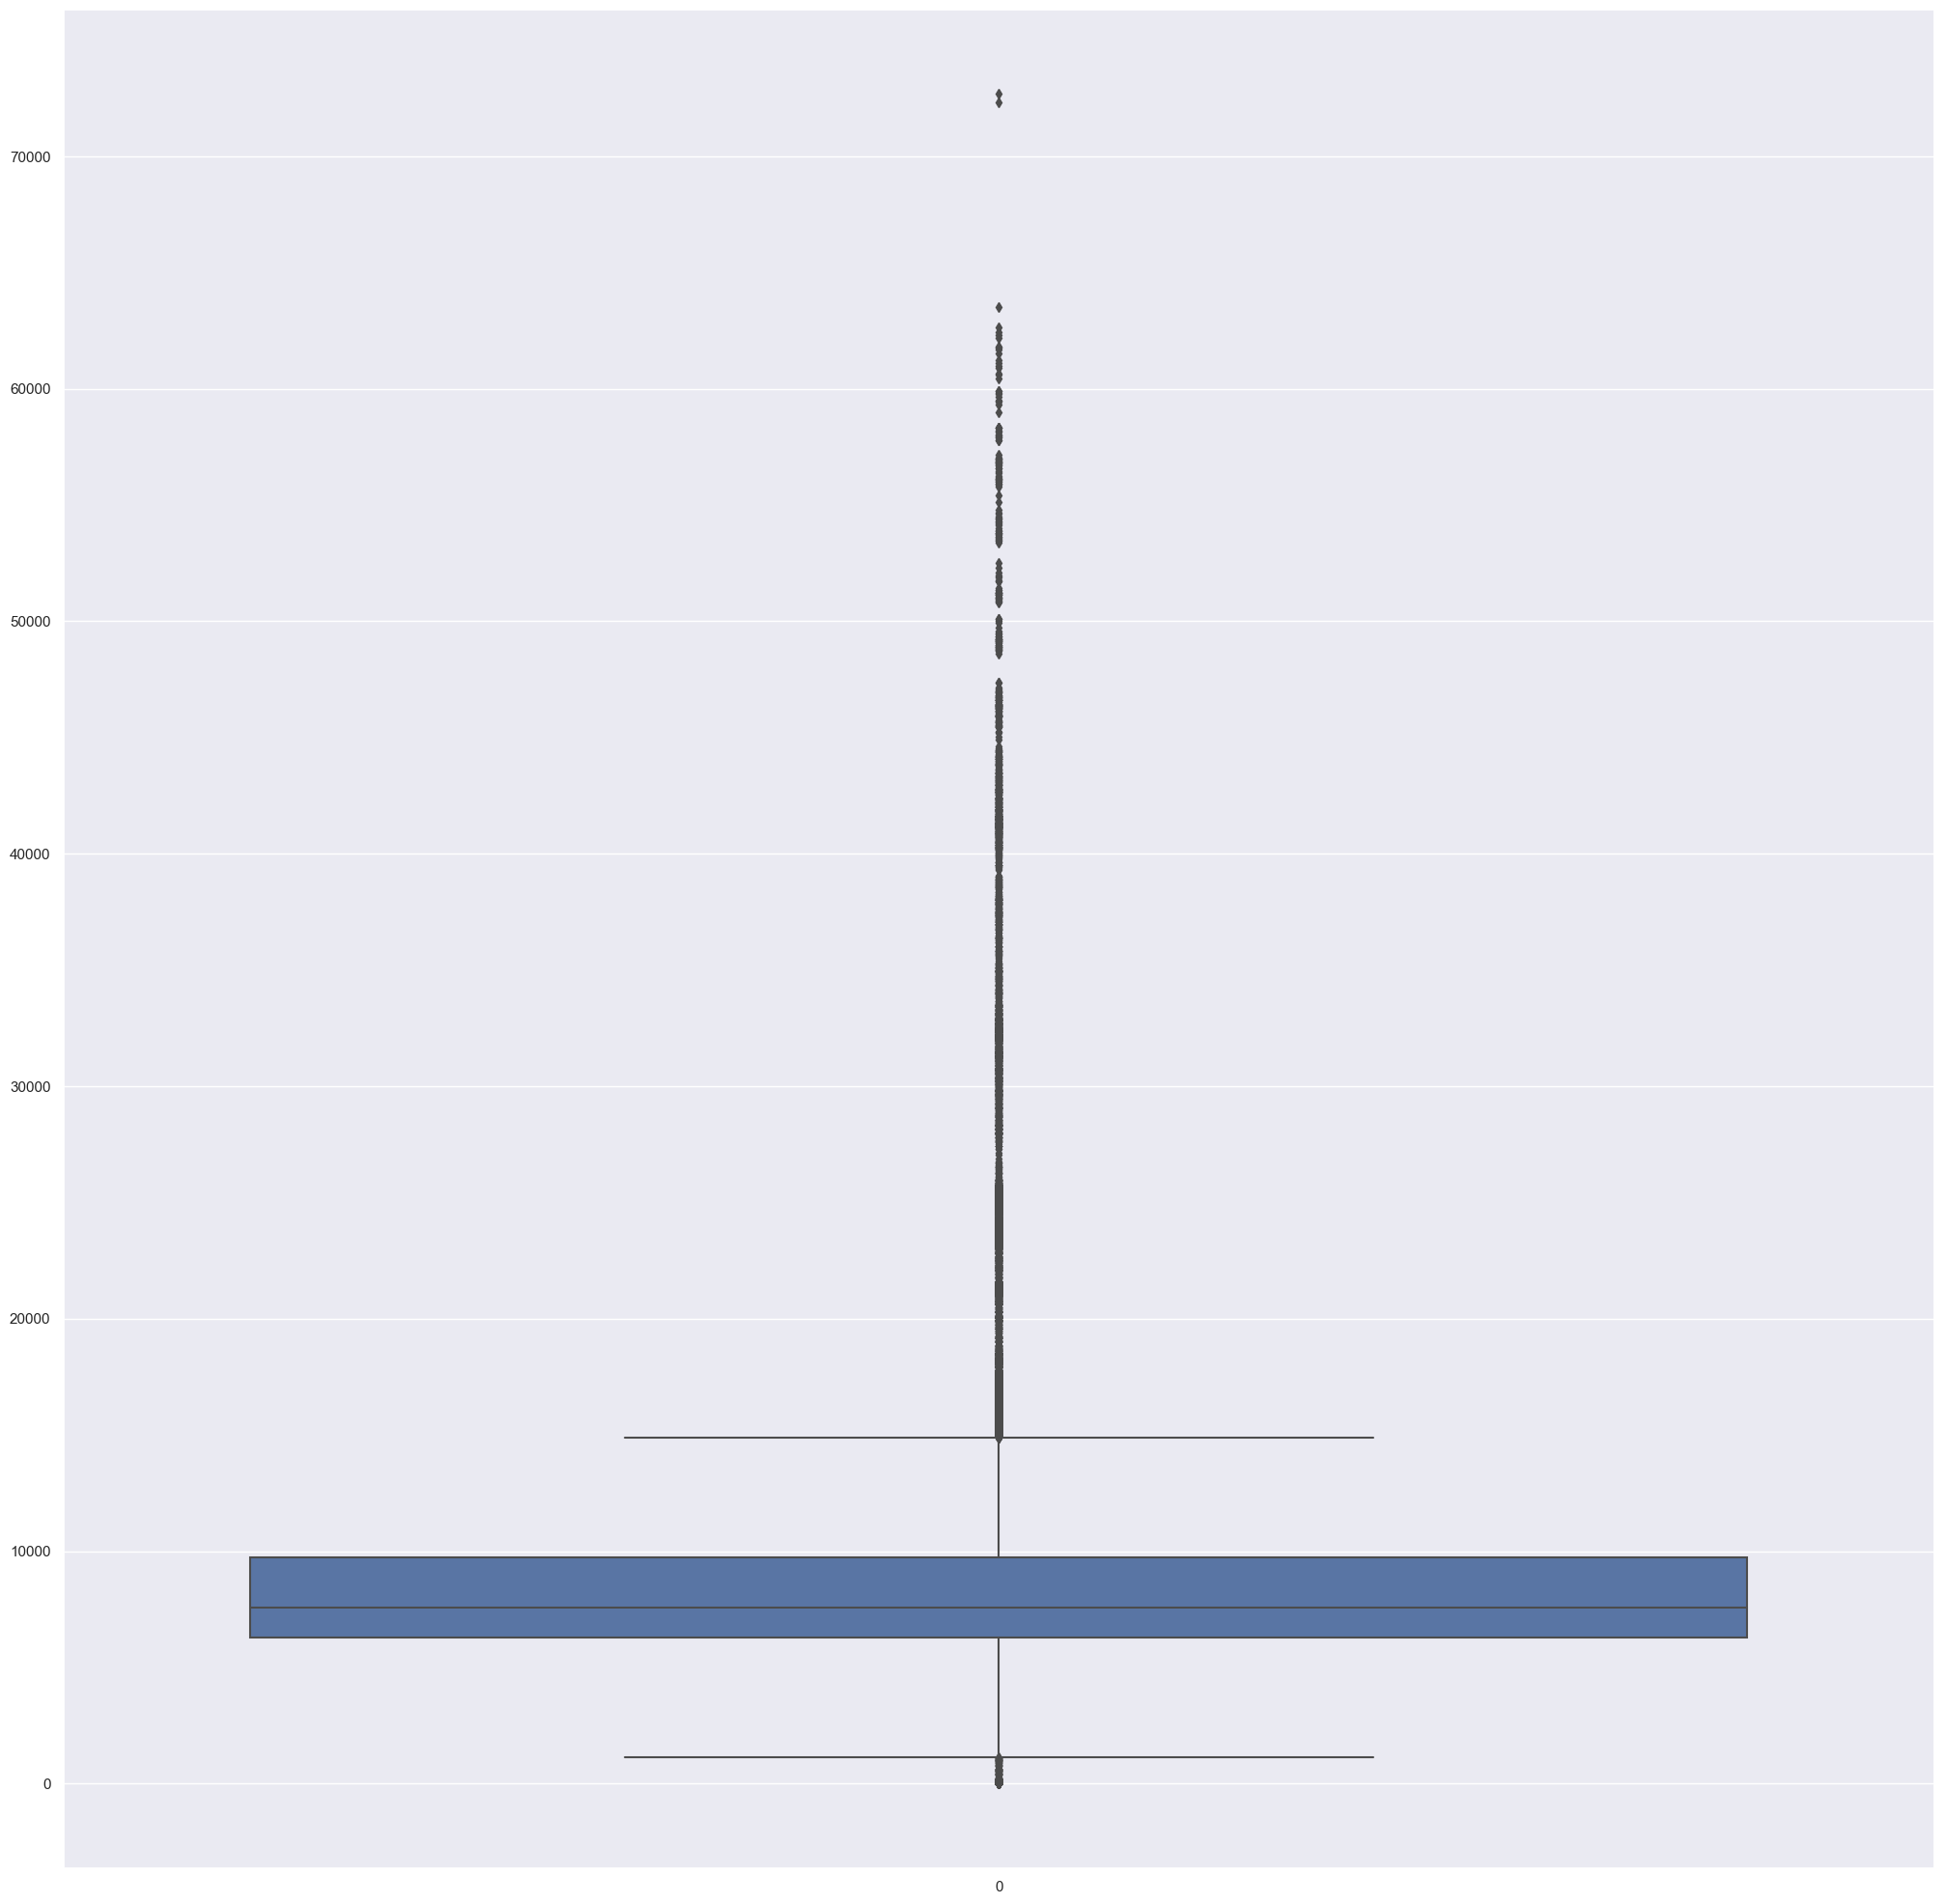

In [35]:
sns.boxplot(asteroid['data_arc'])

<Axes: >

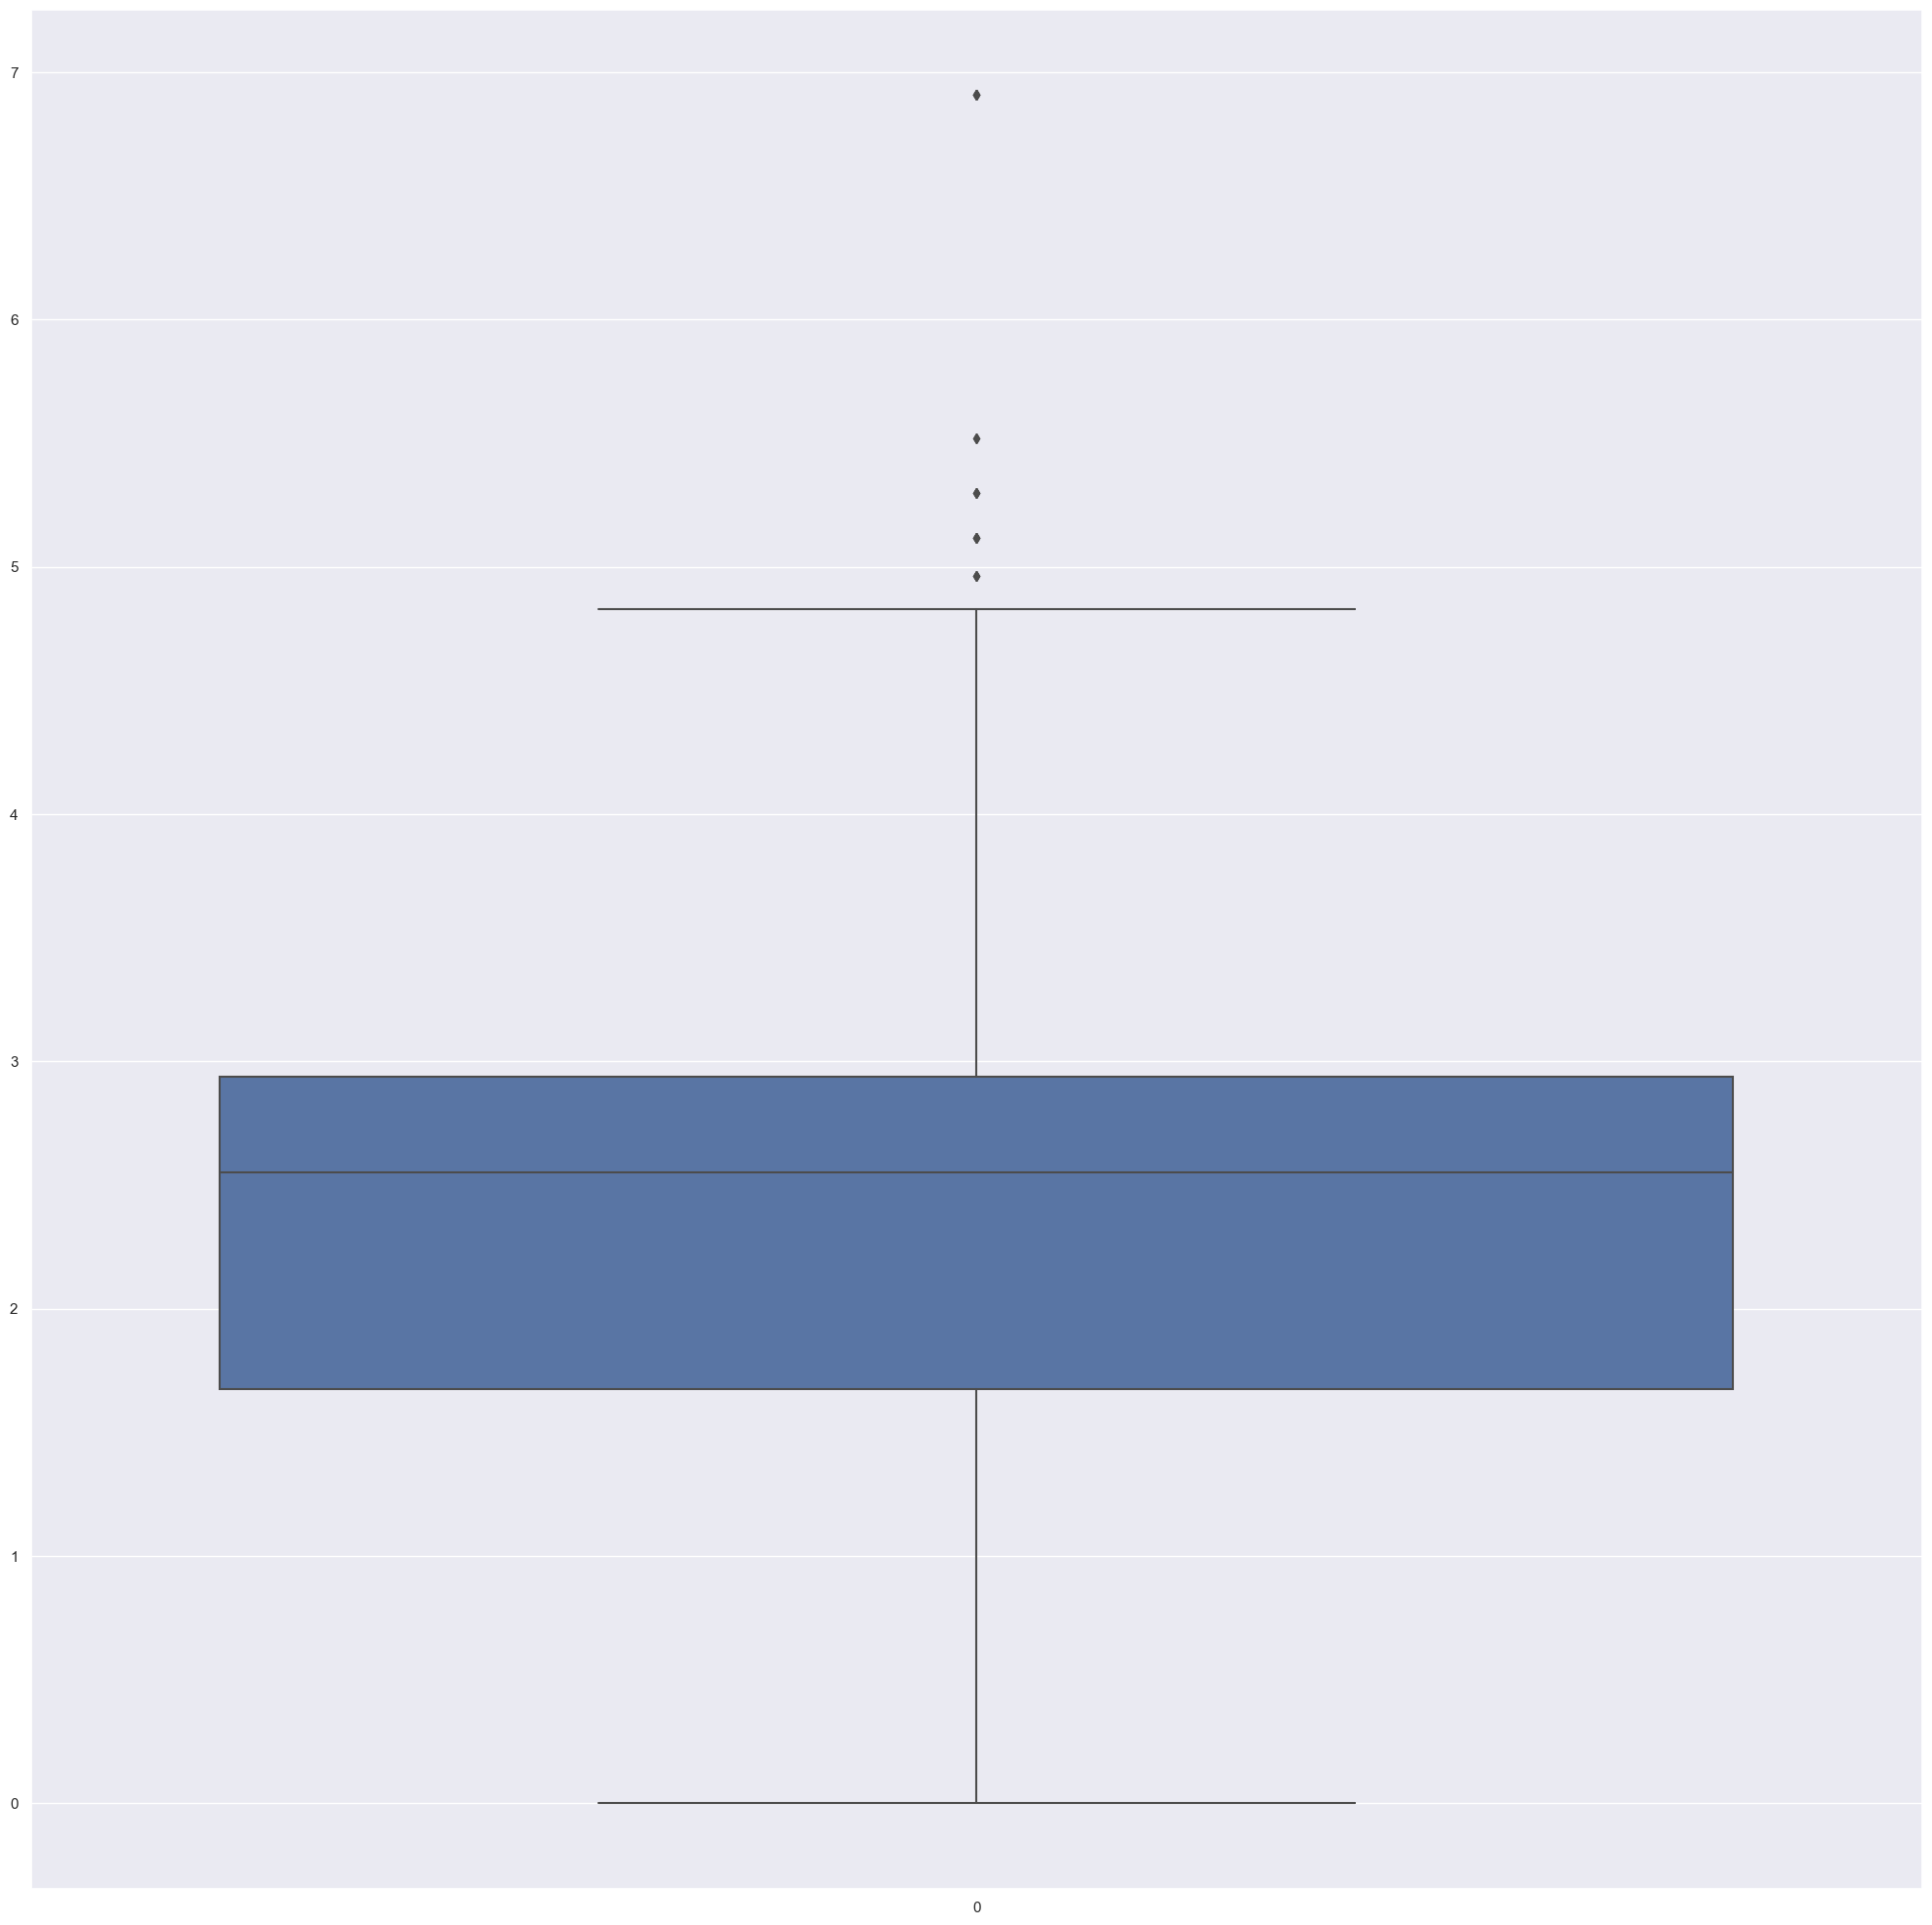

In [36]:
sns.boxplot(asteroid['albedo'])

In [37]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  e = -0.14813765496168466
corelation of  i = 0.132370681553146
corelation of  om = 0.0014940115733321705
corelation of  w = 0.005160507891247732
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  data_arc = 0.3738177316963192
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  albedo = 0.26240106500278454
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  ma = 0.03229989195106305


In [38]:
#combining low corelation features together in ration of their corelation so on reducing dimension all info from those is not lost
asteroid['neg']=-0.14*asteroid['e']+0.26*asteroid['albedo']
asteroid['pos']=0.13*asteroid['i']+0.0014*asteroid['om']+0.005*asteroid['w']+0.032*asteroid['ma']+0.37*asteroid['data_arc']
asteroid.drop(['e','albedo'],axis=1,inplace=True)
asteroid.drop(['i','om','w','ma','data_arc'],axis=1,inplace=True)

In [39]:
#finding corelation of different variables with Diameter 
for i in asteroid.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(asteroid[i], asteroid['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5701489865858509
corelation of  q = 0.5246860997056233
corelation of  ad = 0.48296879972181944
corelation of  per_y = 0.5701489865858509
corelation of  n_obs_used = 0.42924001030778874
corelation of  H = 0.7453447486469593
corelation of  diameter = 0.9999999999999998
corelation of  moid = 0.5292709954026358
corelation of  n = -0.5701489865858509
corelation of  per = 0.5701489865858509
corelation of  neg = 0.2711543239710166
corelation of  pos = 0.37441909407041135


In [40]:
asteroid["neo"]=asteroid["neo"].replace({'Y':1,'N':0})
asteroid["pha"]=asteroid["pha"].replace({'Y':1,'N':0})
df=['n']
asteroid[df]=-1*asteroid[df]

In [41]:
asteroid=asteroid.drop(['class'],axis=1)
asteroid=asteroid.drop(['condition_code'],axis=1)

In [64]:
from sklearn.model_selection import train_test_split
predictors = asteroid.drop('diameter',axis=1) 
target = asteroid['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# Predicting values
## PREDICTING VALUES USING DL

In [45]:
!pip install keras
!pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 3.0 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 9.9 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 8.6 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 16.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 21.3 MB/s eta 0:00:00
     -------------------------------------- 183.3/183.3 kB 5.6 MB/s eta 0:00:00
     ------------------------------------- 422.5/422

In [46]:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
asteroid.shape

(137636, 14)

## Defining network for prediction

In [48]:
 model = Sequential([
    Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'),
    Dense(28, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal')
   ])

In [49]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
x =asteroid.drop(['diameter'],axis=1)

In [51]:
x_y=asteroid['diameter']

In [52]:
x=x.dropna()

In [53]:
x_y=x_y.dropna()

In [54]:
from sklearn import preprocessing

In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
arc_scale = min_max_scaler.fit_transform(x)

In [56]:
x.isna().sum()

a             0
q             0
ad            0
per_y         0
n_obs_used    0
H             0
neo           0
pha           0
moid          0
n             0
per           0
neg           0
pos           0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
arc_train, arc_val_and_test, arc_y_train, arc_y_val_and_test = train_test_split(arc_scale, x_y, test_size=0.3)

In [59]:
arc_val, arc_test, arc_y_val, arc_y_test = train_test_split(arc_val_and_test, arc_y_val_and_test, test_size=0.5)

In [60]:
hist = model.fit(arc_train, arc_y_train,
          batch_size=1000, epochs=400,
          validation_data=(arc_val, arc_y_val))

Epoch 1/400

97/97 [==============================] - 4s 9ms/step - loss: 119.8022 - val_loss: 83.8177
Epoch 2/400
97/97 [==============================] - 0s 4ms/step - loss: 94.3383 - val_loss: 65.1164
Epoch 3/400
97/97 [==============================] - 0s 4ms/step - loss: 89.0061 - val_loss: 63.4976
Epoch 4/400
97/97 [==============================] - 0s 4ms/step - loss: 86.9117 - val_loss: 60.9182
Epoch 5/400
97/97 [==============================] - 1s 5ms/step - loss: 83.2691 - val_loss: 56.3520
Epoch 6/400
97/97 [==============================] - 1s 6ms/step - loss: 76.9559 - val_loss: 49.0606
Epoch 7/400
97/97 [==============================] - 0s 5ms/step - loss: 68.5060 - val_loss: 41.1610
Epoch 8/400
97/97 [==============================] - 0s 5ms/step - loss: 61.1797 - val_loss: 35.7691
Epoch 9/400
97/97 [==============================] - 0s 4ms/step - loss: 55.8107 - val_loss: 31.9250
Epoch 10/400
97/97 [==============================] - 0s 4ms/step - loss: 51.3841 - val_l

97/97 [==============================] - 0s 4ms/step - loss: 6.9151 - val_loss: 2.7997
Epoch 81/400
97/97 [==============================] - 0s 4ms/step - loss: 6.7858 - val_loss: 2.6974
Epoch 82/400
97/97 [==============================] - 0s 4ms/step - loss: 6.6653 - val_loss: 2.6064
Epoch 83/400
97/97 [==============================] - 0s 5ms/step - loss: 6.5378 - val_loss: 2.5805
Epoch 84/400
97/97 [==============================] - 0s 5ms/step - loss: 6.4124 - val_loss: 2.6903
Epoch 85/400
97/97 [==============================] - 0s 4ms/step - loss: 6.3257 - val_loss: 2.4576
Epoch 86/400
97/97 [==============================] - 0s 3ms/step - loss: 6.2364 - val_loss: 3.0006
Epoch 87/400
97/97 [==============================] - 1s 6ms/step - loss: 6.1900 - val_loss: 2.4840
Epoch 88/400
97/97 [==============================] - 0s 4ms/step - loss: 6.0747 - val_loss: 2.3632
Epoch 89/400
97/97 [==============================] - 0s 5ms/step - loss: 6.0067 - val_loss: 2.2573
Epoch 90/400


97/97 [==============================] - 0s 4ms/step - loss: 2.6405 - val_loss: 1.6972
Epoch 162/400
97/97 [==============================] - 0s 3ms/step - loss: 2.6453 - val_loss: 1.5531
Epoch 163/400
97/97 [==============================] - 0s 3ms/step - loss: 2.6598 - val_loss: 1.5675
Epoch 164/400
97/97 [==============================] - 0s 3ms/step - loss: 2.6547 - val_loss: 1.6471
Epoch 165/400
97/97 [==============================] - 0s 4ms/step - loss: 2.6222 - val_loss: 1.7052
Epoch 166/400
97/97 [==============================] - 0s 4ms/step - loss: 2.5940 - val_loss: 1.6150
Epoch 167/400
97/97 [==============================] - 0s 3ms/step - loss: 2.6205 - val_loss: 1.5954
Epoch 168/400
97/97 [==============================] - 0s 3ms/step - loss: 2.5559 - val_loss: 1.5830
Epoch 169/400
97/97 [==============================] - 0s 3ms/step - loss: 2.5333 - val_loss: 1.5613
Epoch 170/400
97/97 [==============================] - 0s 3ms/step - loss: 2.4892 - val_loss: 1.5868
Epoc

97/97 [==============================] - 0s 3ms/step - loss: 1.7220 - val_loss: 1.5374
Epoch 243/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7884 - val_loss: 1.3419
Epoch 244/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7503 - val_loss: 1.4469
Epoch 245/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7595 - val_loss: 1.4194
Epoch 246/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7277 - val_loss: 1.3910
Epoch 247/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7234 - val_loss: 1.3461
Epoch 248/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7136 - val_loss: 1.3676
Epoch 249/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7235 - val_loss: 1.3582
Epoch 250/400
97/97 [==============================] - 0s 4ms/step - loss: 1.7309 - val_loss: 1.3769
Epoch 251/400
97/97 [==============================] - 0s 3ms/step - loss: 1.7230 - val_loss: 1.3824
Epoc

97/97 [==============================] - 0s 3ms/step - loss: 1.5404 - val_loss: 1.3355
Epoch 324/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5350 - val_loss: 1.3347
Epoch 325/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5294 - val_loss: 1.3267
Epoch 326/400
97/97 [==============================] - 0s 4ms/step - loss: 1.5377 - val_loss: 1.2917
Epoch 327/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5223 - val_loss: 1.3459
Epoch 328/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5121 - val_loss: 1.3704
Epoch 329/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5054 - val_loss: 1.3224
Epoch 330/400
97/97 [==============================] - 0s 3ms/step - loss: 1.4992 - val_loss: 1.3273
Epoch 331/400
97/97 [==============================] - 0s 4ms/step - loss: 1.5045 - val_loss: 1.2736
Epoch 332/400
97/97 [==============================] - 0s 3ms/step - loss: 1.5348 - val_loss: 1.3372
Epoc

In [61]:
model.evaluate(arc_test, arc_y_test)

646/646 [==============================] - 1s 2ms/step - loss: 1.5414


1.541378378868103

In [62]:
x_new=model.predict(arc_test)

646/646 [==============================] - 2s 2ms/step


# Random Forest Classifier

In [66]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(arc_y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(arc_y_test,prediction, c='orange',label='predictions')
    ax2.plot(arc_y_test,arc_y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,arc_y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))

In [67]:
algorithms = []
scores = []
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=22, n_estimators=50)

### Training 
forest.fit(arc_train,np.ravel(arc_y_train))

###Predicting
arc_y_pred_forest = forest.predict(arc_test)

### Scoring
score_forest = score(arc_y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.98


# Linear Regressor

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : -0.383
rms value for the regression  : 8.232


C:\Users\hp\AppData\Local\Temp\ipykernel_1980\2286139865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.values,label='test values', ax=ax1)
C:\Users\hp\AppData\Local\Temp\ipykernel_1980\2286139865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred_lr ,label='prediction', ax=a

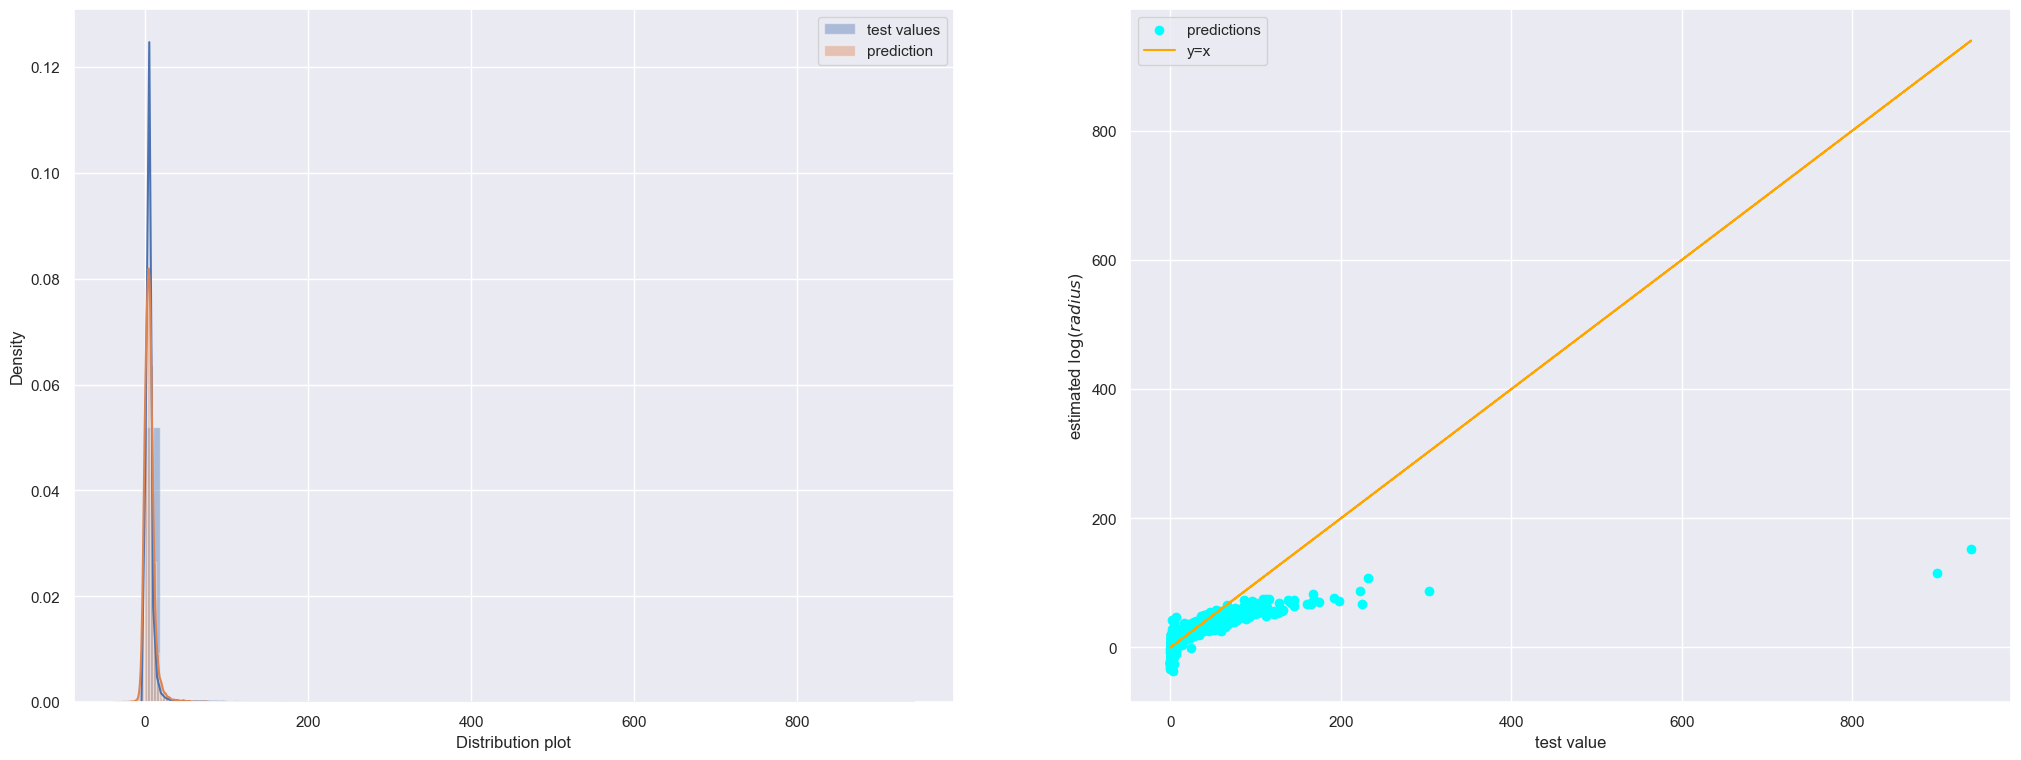

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

# Polynomial Regressor

In [70]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)

pr.fit(X_train,Y_train)
x_poly=pr.fit_transform(X_train)
X_test_poly=pr.fit_transform(X_test)
###Training
lr.fit(x_poly,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test_poly)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.925
rms value for the regression  : 2.743


# XG Boost

In [71]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test)

### Scoring
score_xgb = r2_score(Y_pred_xgb,Y_test)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.172
rms value for the regression  : 7.374


# SVM

In [ ]:
from sklearn import svm
svmreg = svm.SVR()


svmreg.fit(X_train,Y_train)


Y_pred_svm = svmreg.predict(X_test)

score_svm = r2_score(Y_pred_svm,Y_test)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))